<a href="https://colab.research.google.com/github/Pratik94229/Capstone-3/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Books Recommendation System



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Name -** Pratik Thorat


# **GitHub Link -**

https://github.com/Pratik94229/Capstone-4

# **Problem Statement**


* During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

* In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **Project Summary -**

* The book recommendation system project aimed to build a comprehensive recommendation system that can provide users with personalized book recommendations. 
* The project involved the implementation of four different recommendation techniques - user-based, item-based, knowledge-based, and matrix factorization, as well as the creation of a hybrid recommendation system that combines the strengths of each technique.

* The first technique applied was the user-based collaborative filtering approach, which uses the similarities between users to make recommendations. This method analyzed the user's historical book ratings and made recommendations based on similar ratings from other users.

* The second technique was the item-based collaborative filtering approach, which uses the similarities between items to make recommendations. This method analyzed the book features such as genre, author, publisher, and publication date to suggest books that are similar to the user's preferred genre, author, or publisher.

* The third technique was the knowledge-based recommendation system, which recommends books based on the user's preferences and interests. This system used a decision tree to recommend books based on the user's responses to a set of questions regarding their reading preferences.

* The fourth technique applied was the matrix factorization approach, which uses matrix decomposition to estimate the latent features of users and items. This technique was used to predict the rating that a user would give to a particular book.

* Finally, a hybrid recommendation system was created that combines the strengths of all four techniques. This system used the output of the user-based, item-based, and knowledge-based systems as input to the matrix factorization model to generate the final recommendations.

* Then implementation of all models was done using library using which cross validation and hyperparameter tuning was conducted.

* Finally deployment was done using streamlit library.

* The book recommendation system was developed using Python programming language and various libraries such as Pandas, NumPy, Scikit-learn, Surprise, and Streamlit. The system was deployed as a web application that allows users to input their preferences and receive personalized book recommendations.

* Overall, the project successfully created a comprehensive book recommendation system that utilizes multiple techniques to provide users with accurate and personalized recommendations.

# ***Let's Begin !***

In [ ]:
# For checking progress of Python code execution
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install surprise

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

#Time remaining in for loop.
from time import sleep
from tqdm import tqdm

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#reading dataset
working_dir='/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone 4/'
books_df=pd.read_csv(working_dir+'Books.csv',low_memory=False)
ratings_df=pd.read_csv(working_dir+'Ratings.csv')
users_df=pd.read_csv(working_dir+'Users.csv')


### Dataset First View

In [ ]:
# Dataset First Look
books_df.head(3)

In [ ]:
#first look
ratings_df.head(3)

In [ ]:
#first look
users_df.head(3)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dict_df={'books':books_df,'ratings':ratings_df,'users':users_df}
for key in dict_df.keys():
  print(f'---------------------------------\n{key} dataframe rows and columns:\n{dict_df[key].shape}')


### Dataset Information

In [ ]:
# Dataset Info
for key in dict_df.keys():
  print(f'-------------Info of {key} dataframe------------------\n\n\n{dict_df[key].info()}')


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
for key in dict_df.keys():
  print(f'################### Duplicates in {key} ###################\n\n\n{dict_df[key][dict_df[key].duplicated()].count()}\n\n')


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
for key in dict_df.keys():
  print(f'################### Missing values in {key} dataframe ###################\n\n\n{dict_df[key].isna().sum()}\n')




In [ ]:
# Visualizing the missing values in users dataframe
msno.matrix(users_df)

In [ ]:
#Handling missing and null values in book dataframe
#books_df.dropna(inplace=True)
books_df['Publisher'].fillna('Unknown', inplace=True)
#books_df['Year-Of-Publication'].fillna(books_df['Year-Of-Publication'].median(), inplace=True)


In [ ]:
#Handling missing and null values in ratings dataframe
#ratings_df.dropna(inplace=True)
ratings_df['Book-Rating'].fillna(0, inplace=True)

In [ ]:
#Handling missing and null values in users dataframe
#users_df.dropna(inplace=True)
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

In [ ]:
#Again Checking  Missing Values/Null Values Count
for key in dict_df.keys():
  print(f'######################### Missing values in {key} dataframe #########################\n\n\n{dict_df[key].isna().sum()}\n')




### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset 
for key in dict_df.keys():
  print(f'########################  Columns in {key} dataframe   ########################\n\n\n{dict_df[key].columns}\n\n')

In [ ]:
# Dataset Describe
for key in dict_df.keys():
  print(f'----------------Description of {key} dataframe-------------------------\n\n\n{dict_df[key].describe()}\n\n')

### Variables Description 

**1) Users dataframe**:

* Contains the users. 

   (Note that user IDs (User-ID) have been anonymized and map to integers.)
*  Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**2) Books dataframe**:

* Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. 
* Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of- Publication, Publisher), obtained from Amazon Web Services.
  
  (Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLS point to the Amazon website.)

**3) Ratings**:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for key in dict_df.keys():
  print(f'--------------Unique values in {key} dataframe-------------------------\n\n\n{dict_df[key].nunique()}\n\n')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
merged_dataset= ratings_df.merge(books_df,on='ISBN')
merged_dataset=merged_dataset.merge(users_df,on='User-ID')

In [ ]:
merged_dataset[merged_dataset['Year-Of-Publication']=='DK Publishing Inc']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
85425,130571,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,"summerville, south carolina, usa",32.0
346284,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,"savion, n/a, israel",19.0
594299,169663,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,"towson, maryland, usa",32.0


In [ ]:
merged_dataset[merged_dataset['Year-Of-Publication']=='Gallimard']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
402556,137190,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,"rennes, bretagne, france",31.0


In [ ]:
# Create a dictionary mapping each unique value in the 'City' column to an integer
year_map = {'DK Publishing Inc': 2000,'Gallimard':2003}

# Replace the values in the 'City' column with their corresponding integer values
merged_dataset['Year-Of-Publication'] = merged_dataset['Year-Of-Publication'].replace(year_map)

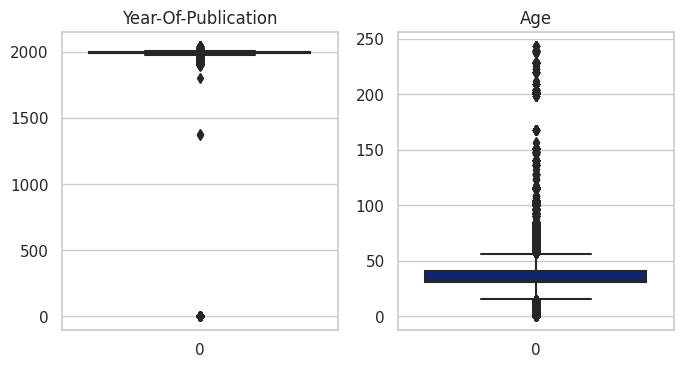

In [ ]:
# checking Outliers with seaborn boxplot
check_outlier=['Year-Of-Publication','Age']
n =0
plt.figure(figsize=(7,7))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(merged_dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

In [ ]:
# Replace age values above 90 with the mean value of the age column

mean_age = merged_dataset['Age'][merged_dataset['Age'] < 90].mean()  # Calculate the mean value

merged_dataset.loc[merged_dataset['Age'] < 10, 'Age'] = mean_age  # Replace the values
merged_dataset.loc[merged_dataset['Age'] > 90, 'Age'] = mean_age  # Replace the values

In [ ]:
# Replace year values above  with the mean value of the age column
merged_dataset['Year-Of-Publication'] = pd.to_numeric(merged_dataset['Year-Of-Publication'], errors='coerce')

most_frequent_value = merged_dataset['Year-Of-Publication'].value_counts().idxmax()
# Calculate the mean value

merged_dataset.loc[merged_dataset['Year-Of-Publication'] < 1900, 'Year-Of-Publication'] = most_frequent_value   # Replace the values
merged_dataset.loc[merged_dataset['Year-Of-Publication'] > 2017, 'Year-Of-Publication'] = most_frequent_value   # Replace the values

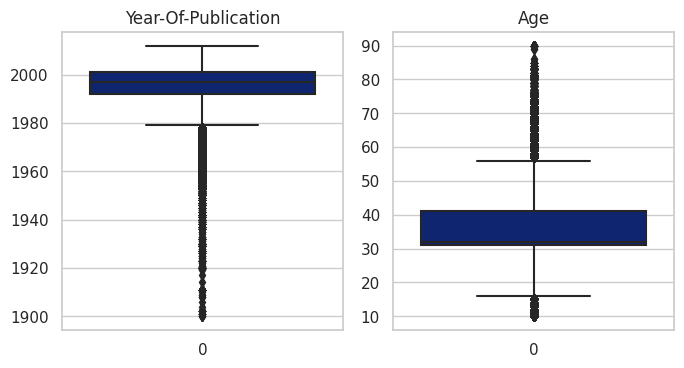

In [ ]:
# checking Outliers with seaborn boxplot
check_outlier=['Year-Of-Publication','Age']
n =0
plt.figure(figsize=(7,7))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(merged_dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#<b>Insights about books data.

#1) Top 10 rated books.

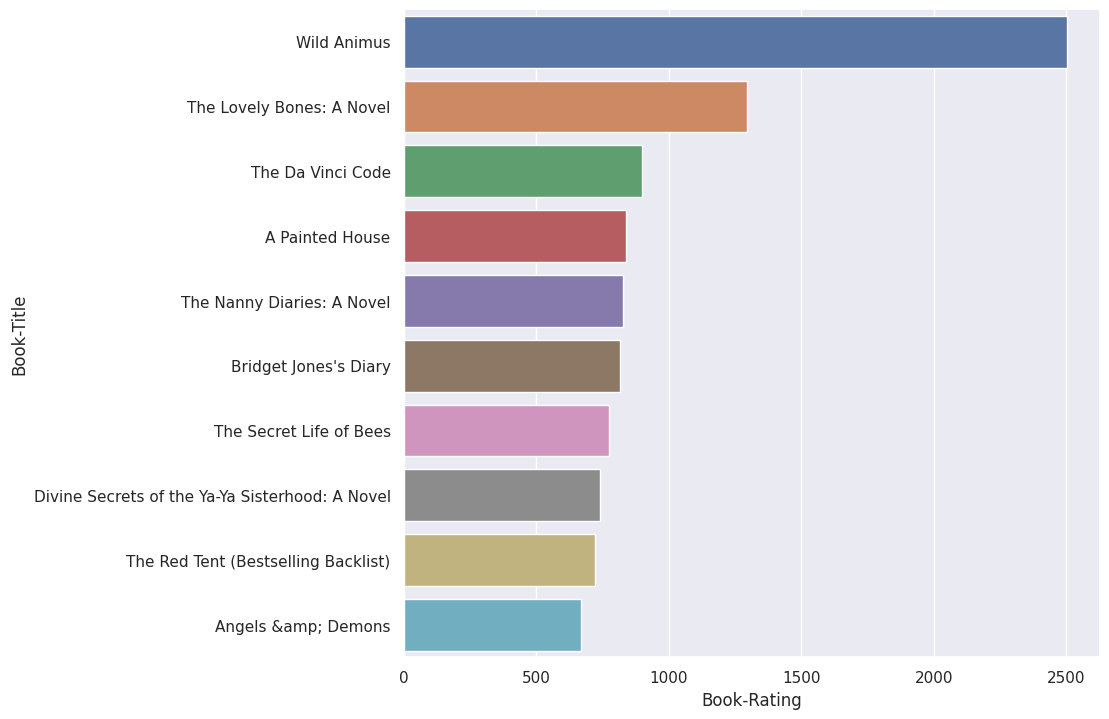

In [ ]:
# Chart - 1 visualization code
top_rated_books = merged_dataset.groupby(['Book-Title'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(10)
sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books)
plt.show()

##### 1. Why did you pick the specific chart?

 Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

Wild Animus,The Lovely Bones: A Novel, The Da Vinci Code,A Painted House, The Nanny Diaries: A Novel,Bridget Jones's Diary, The Secret Life of Bees,Divine Secrets of the Ya-Ya Sisterhood: A Novel,The Red Tent (Bestselling Backlist) are the top rated books

#2) Top rated authors

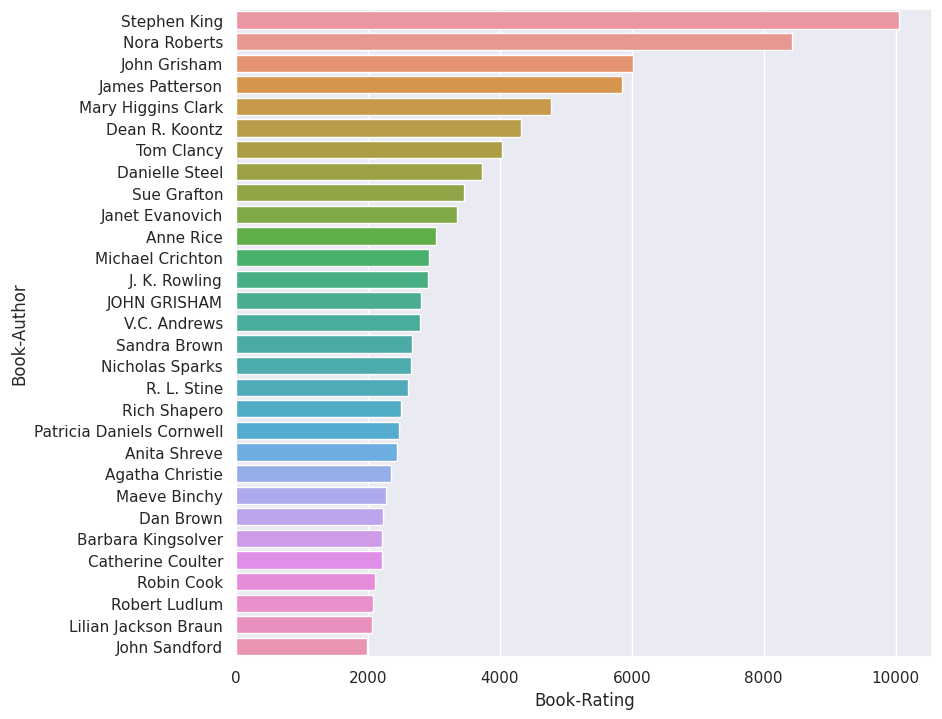

In [ ]:
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(8,8)})
top_book_authors = merged_dataset.groupby(['Book-Author'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(30)
sns.barplot(x='Book-Rating', y='Book-Author', data=top_book_authors)
plt.show()

1. What is/are the insight(s) found from the chart?

* Stephen King', 'Nora Roberts', 'John Grisham' are the top three rated authors.

#### Chart - 3

#3) Distribution of no. of books by publishing house.

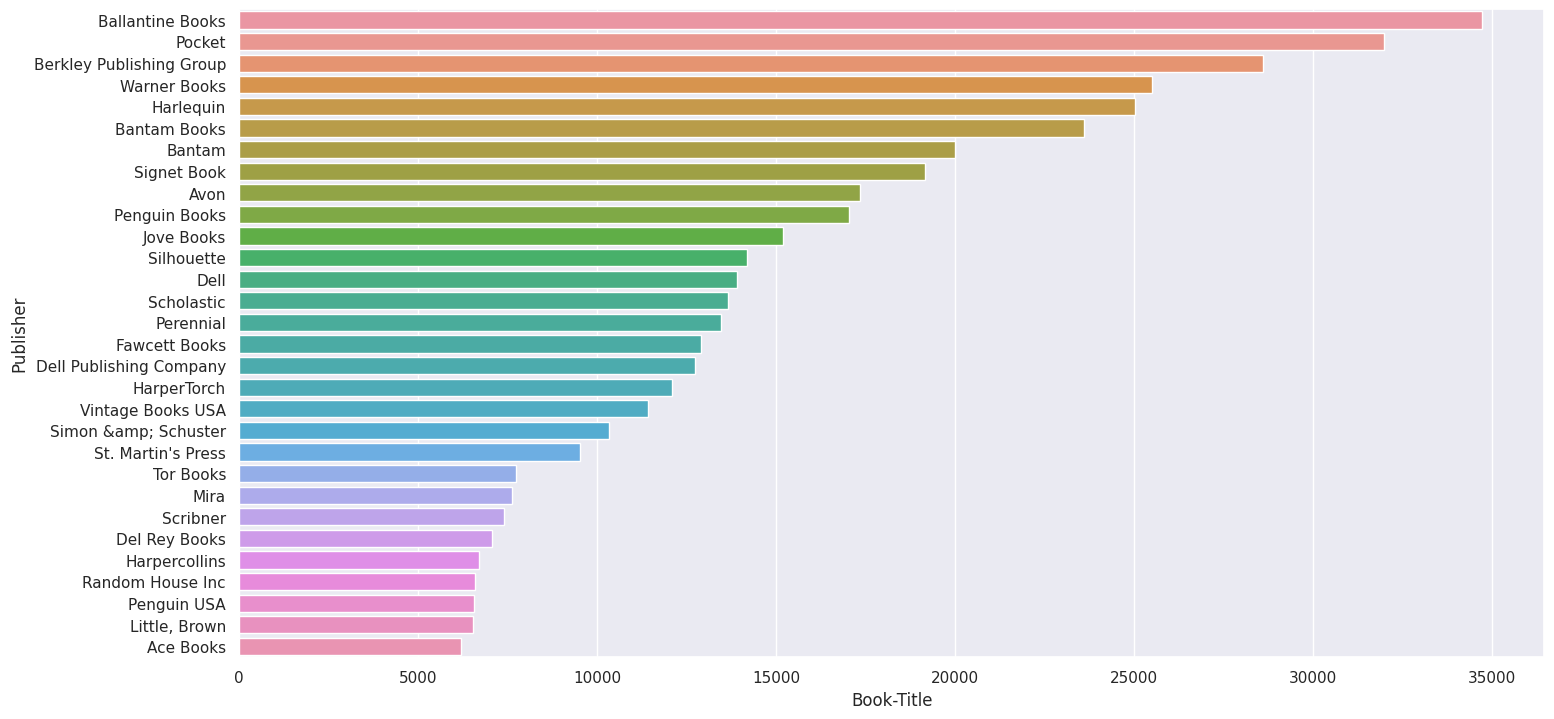

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
top_publisher = merged_dataset.groupby(['Publisher'])['Book-Title'].count().reset_index().sort_values(['Book-Title'], ascending=False).head(30)
sns.barplot(y='Publisher', x='Book-Title', data=top_publisher)
plt.show()

1. What is/are the insight(s) found from the chart?## 

*  Ballantine Books is the publisher with the highest number of published books, followed by Pocket and Berkley publisher group. 

#### Chart - 4

# 4) Distribution of Ratings.

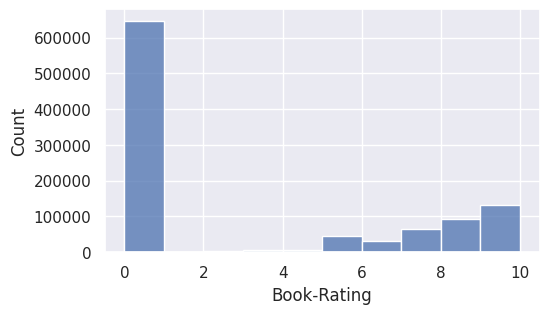

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(5,3)})

# Create the histogram plot of book ratings with 10 bins
sns.histplot(data=merged_dataset, x='Book-Rating', bins=10)

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of books are unrated.
* Amoung rated books , most books got rating above 8.

1. What is/are the insight(s) found from the chart?

* Most numbers of books are published by Ballantine Books then by Pocket then by Berkley publisher group.

Chart 5

# 5) Distribution of books as per year of publication.

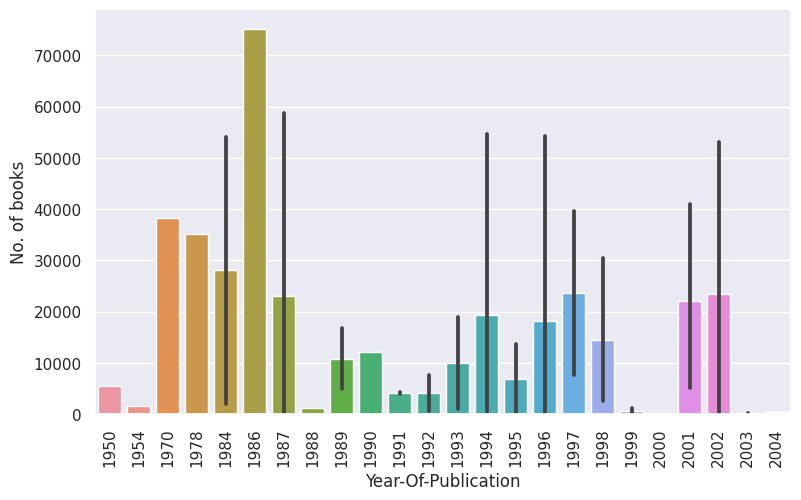

In [ ]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of books published per year and sort by year
year_counts = merged_dataset[['Year-Of-Publication']].value_counts().reset_index()
year_counts = year_counts.rename(columns={0: 'No. of books'})
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(8,5)})

# Create the bar plot with horizontal x-tick labels
ax = sns.barplot(x=merged_dataset['Year-Of-Publication'][:70], y=year_counts['No. of books'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of books are published in year 1986.

#### Chart - 6

# <b>Insights about Users.

# 6)User-id vs Number of rating 

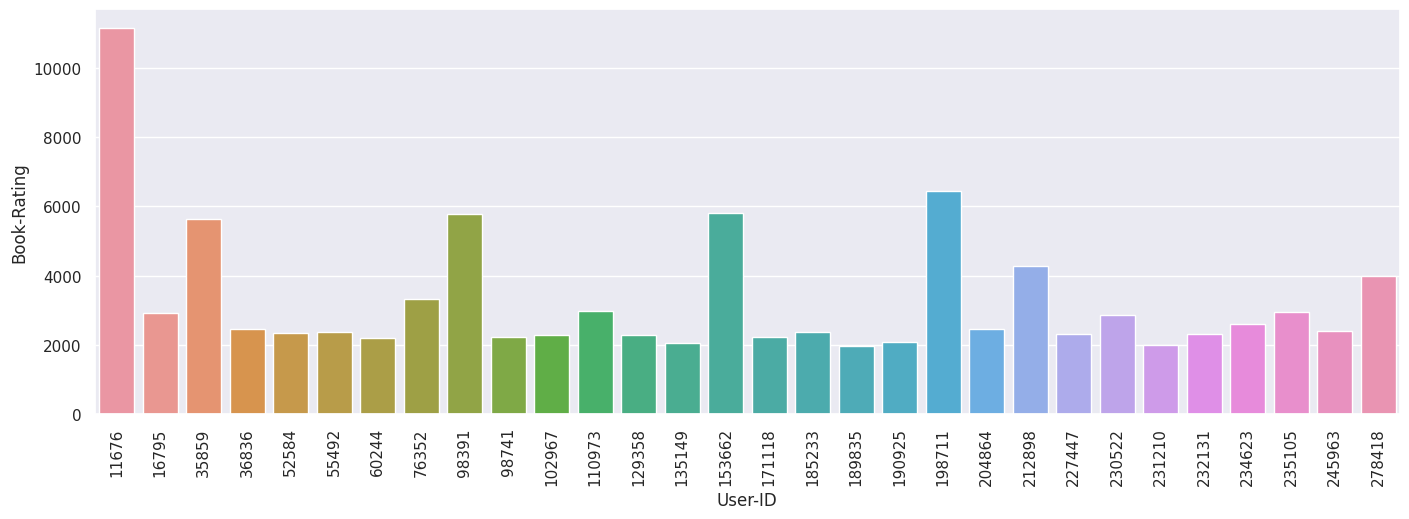

In [ ]:
# Chart - 4 visualization code

# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(15,5)})

top_users = merged_dataset.groupby(['User-ID'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(30)
ax = sns.barplot(x='User-ID', y='Book-Rating', data=top_users)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* There are few user-ids from where lots of ratings for book have came which might be possible if only it is used by many people (Eg. Library )

Chart - 7

#7) Age distribution of users.

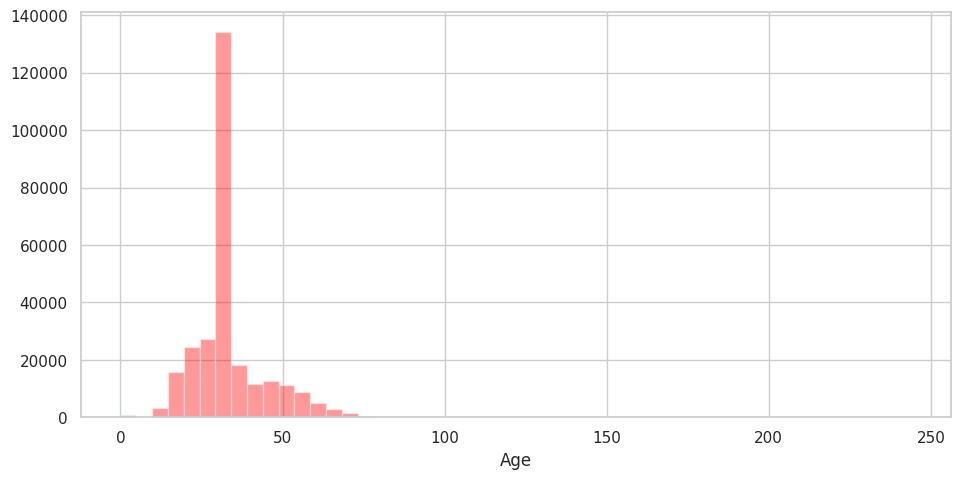

In [ ]:
# Chart - 6 visualization code
# set the background style of the plot
import matplotlib.pyplot as plt
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.distplot(users_df['Age'], kde = False, color ='red', bins = 50)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Most of the users in the age group of 25-45 years of age after which number of users goes on decreasing with increase in age. 

#### Chart - 8

#Age vs Book-Rating

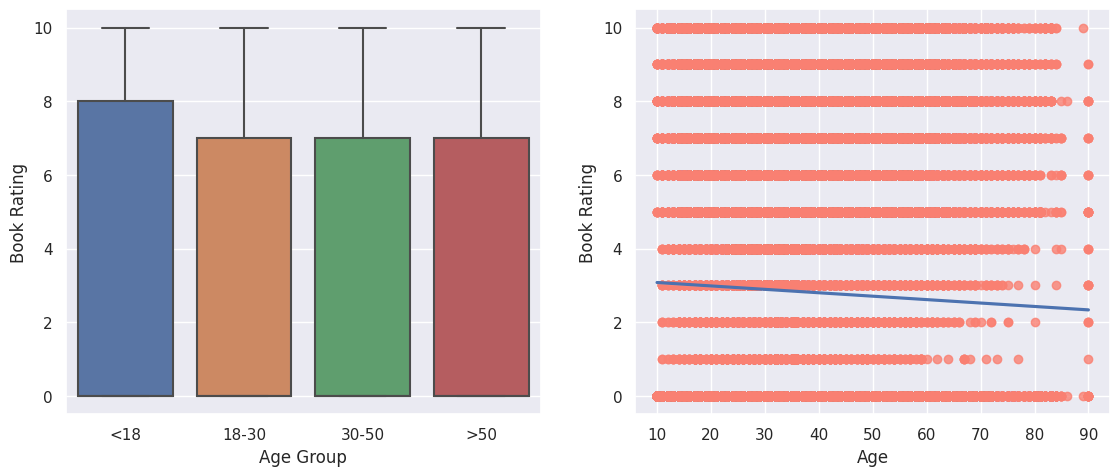

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create the first subplot (box plot)
merged_dataset['Age Group'] = pd.cut(merged_dataset['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '>50'])
sns.boxplot(x='Age Group', y='Book-Rating', data=merged_dataset, ax=ax1)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Book Rating')

# Create the second subplot (scatter plot)
sns.regplot(x='Age', y='Book-Rating',scatter_kws={"color": "salmon"},data=merged_dataset, ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Book Rating')

# Display the plot
plt.show()


##### 1. What is/are the insight(s) found from the chart?

* Young generation give rating more generously than older users.

Chart - 9

# 9) Distribution of users as per location.

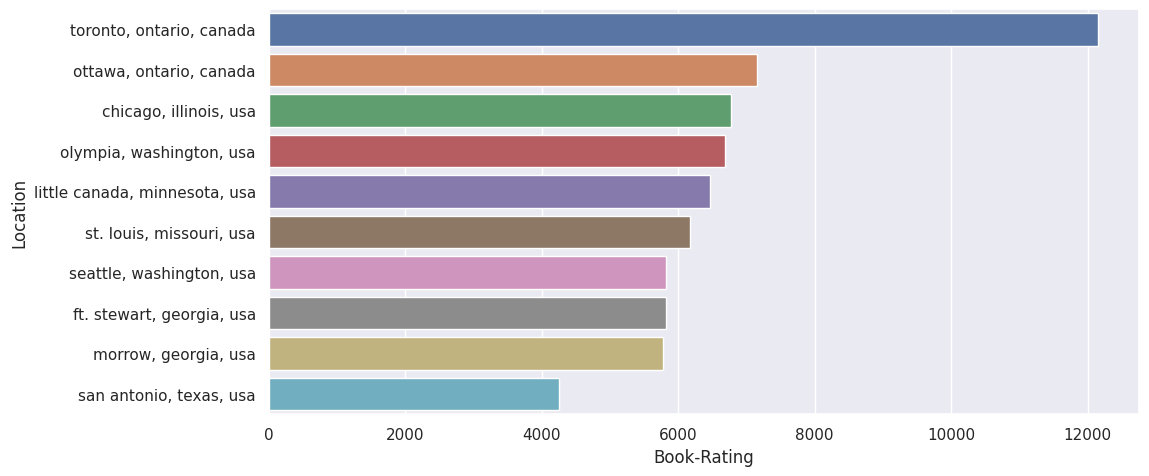

In [ ]:
# Chart - 7 visualization code
# Set the plot style and increase figure size
sns.set(rc={'figure.figsize':(10,5)})
top_user_locations = merged_dataset.groupby(['Location'])['Book-Rating'].count().reset_index().sort_values(['Book-Rating'], ascending=False).head(10)
sns.barplot(x='Book-Rating', y='Location', data=top_user_locations)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Most of the users are from Toronto and Ottawa,Canada while rest are from USA. 

#### Chart - 10 - Correlation Heatmap

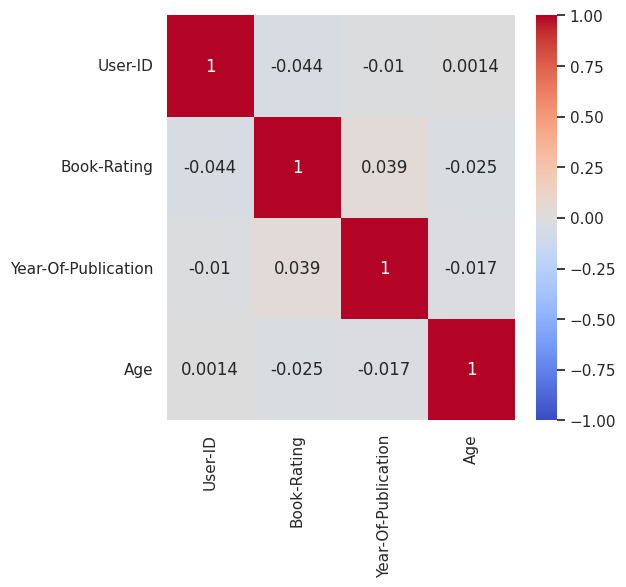

In [ ]:

# Correlation Heatmap visualization code
corr_df = merged_dataset                  
corr_df = corr_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 11 - Pair Plot 

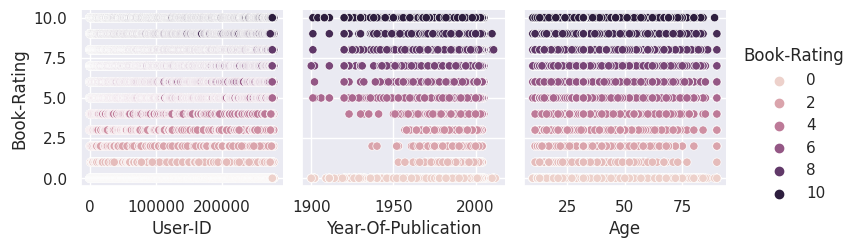

In [ ]:
# Pair Plot visualization code
numeric_col = ['User-ID','Book-Rating','Age']
sns.pairplot(merged_dataset, hue='Book-Rating',y_vars ='Book-Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python.

#<b> EDA Conclusions:-

* The book dataset analysis revealed that Wild Animus, The Lovely Bones: A Novel, and The Da Vinci Code are the top three rated books.
*  Stephen King, Nora Roberts, and John Grisham are the top-rated authors.
*  It was observed that the maximum number of books from the collection are unrated.

* Among rated books, most books are given a rating above 8.
*  Ballantine Books is the publisher with the highest number of published books, followed by Pocket and Berkley publisher group. 
* The maximum number of books are published in the year 1986.

* A few user-ids have provided a large number of ratings for books, which suggests that these ids might be available in libraries or other public places where many people use them.

* Most of the users in the age group of 25-45 years of age after which the number of users decreases with an increase in age. 
* Younger generations tend to give ratings more generously than older users.

* Finally, most of the users are from Toronto and Ottawa, Canada, while the rest are from the USA. 
* Overall, this analysis provides insights into the book dataset, which can help with better recommendations and decision-making. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in the book-rating with respect to Age of user .

<b>H1(alternate hypothesis):There is significant difference in the book-rating with respect to Age of user .

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Get two samples based on a condition
sample1 = merged_dataset[merged_dataset['Age'] <= 35]['Book-Rating']
sample2 = merged_dataset[merged_dataset['Age'] > 50]['Book-Rating']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2, equal_var=False)

# Print the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)
if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the book-rating with respect to Age of user .')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the book-rating with respect to Age of user .')   



T-statistic: 11.669980538294698
P-value: 1.8681144883281745e-31
We are rejecting null hypothesis.
i.e There is significant difference in the book-rating with respect to Age of user .


##### Which statistical test have you done to obtain P-Value?

Two sample T-test

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in mean Book-
Rating between users from Canada and the United States.

H1(alternate hypothesis): There is  significant difference in mean Book-
Rating  between users from Canada and the United States.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Create two separate dataframes for users from Canada and the United States
canada_df = merged_dataset[merged_dataset['Location'].str.contains('canada', case=False)]
us_df = merged_dataset[merged_dataset['Location'].str.contains('usa', case=False)]

# Get the mean ratings for each group
canada_mean = canada_df['Book-Rating'].mean()
us_mean = us_df['Book-Rating'].mean()

# Perform a two-sample t-test assuming unequal variances
t_stat, p_val = stats.ttest_ind(canada_df['Book-Rating'], us_df['Book-Rating'], equal_var=False)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_val)

if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the mean book-rating between users from Canada and the United States..')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the mean book-rating between users from Canada and the United States..')

t-statistic: -0.8805101157427964
p-value: 0.3785846741433566
We are rejecting null hypothesis.
i.e There is significant difference in the book-rating with respect to location of user.


##### Which statistical test have you done to obtain P-Value?

Two sample T-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0(null hypothesis): There is no significant difference in Book-
Rating with respect to year of publication.

H1(alternate hypothesis): There is  significant difference in Book-
Rating with respect to year of publication.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Divide the dataset into two groups based on year of publication
before_2000 = merged_dataset[merged_dataset['Year-Of-Publication'] < 2000]['Book-Rating']
after_2000 = merged_dataset[merged_dataset['Year-Of-Publication'] >= 2000]['Book-Rating']

# Calculate the mean rating for each group
mean_before = before_2000.mean()
mean_after = after_2000.mean()

# Perform a t-test to determine whether the difference in means is statistically significant
t_stat, p_val = stats.ttest_ind(before_2000, after_2000, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_val)
if p_value < 0.05:
  print('We are rejecting null hypothesis.\ni.e There is significant difference in the book-rating with respect to year of publication.')
else:
  print('We are accepting null hypothesis.\ni.e There is no significant difference in the book-rating with respect to year of publication.')   




T-statistic: -46.880344275657144
P-value: 0.0
We are rejecting null hypothesis.
i.e There is significant difference in the book-rating with respect to year of publication.


##### Which statistical test have you done to obtain P-Value?

Two sample T-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

#<b>Popularity Based Recommendation System

In [ ]:
count_ratings=merged_dataset.groupby('Book-Title')['Book-Rating'].count().reset_index()
count_ratings.rename(columns={'Book-Rating':'count_ratings'},inplace=True)
count_ratings.head(3)

,Book-Title,count_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1


In [ ]:
mean_rating=merged_dataset.groupby('Book-Title')['Book-Rating'].mean().reset_index()
mean_rating.rename(columns={'Book-Rating':'mean_ratings'},inplace=True)
mean_rating.head(3)

,Book-Title,mean_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00


In [ ]:
book_mean_rating=pd.merge(count_ratings,mean_rating, on='Book-Title', how='inner')
popular_books=book_mean_rating[book_mean_rating['count_ratings']>=150].sort_values('mean_ratings',ascending=False)
popular_books.head(50)

,Book-Title,count_ratings,mean_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
189274,The Giver (21st Century Reference),179,4.916201
94259,Ishmael: An Adventure of the Mind and Spirit,162,4.907407


In [ ]:
popular_books = popular_books.merge(books_df,on='Book-Title').drop_duplicates('Book-Title')
popular_books=popular_books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','count_ratings','mean_ratings','Publisher']]
popular_books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,count_ratings,mean_ratings,Publisher
0,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,Scholastic
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289,Scholastic
5,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410,Scholastic


#Recommendation based on similar authors.





In [ ]:
def author_based_filtering(author,book_name):
  df=merged_dataset[merged_dataset['Book-Author']==author].drop_duplicates('Year-Of-Publication')[['Book-Title','Book-Author','Image-URL-M']]
  df=df[~(df['Book-Title'].str.contains(book_name))]
  return df.reset_index().drop('index', axis=1)

In [ ]:
author_based_filtering('Anne Rice','Cry to Heaven')

,Book-Title,Book-Author,Image-URL-M
0,Pandora: New Tales of the Vampires (New Tales ...,Anne Rice,http://images.amazon.com/images/P/0345422384.0...
1,Feast of All Saints,Anne Rice,http://images.amazon.com/images/P/0345334531.0...
2,The Queen of the Damned (Vampire Chronicles (P...,Anne Rice,http://images.amazon.com/images/P/0345351525.0...
3,"The Vampire Armand (The Vampire Chronicles, Bo...",Anne Rice,http://images.amazon.com/images/P/0345434803.0...
4,The Mummy or Ramses the Damned,Anne Rice,http://images.amazon.com/images/P/0345369947.0...
5,Der FÃ?Â¼rst der Finsternis. Roman.,Anne Rice,http://images.amazon.com/images/P/3442098424.0...
6,Vittorio the Vampire: New Tales of the Vampires,Anne Rice,http://images.amazon.com/images/P/0345422392.0...
7,Blackwood Farm (The Vampire Chronicles),Anne Rice,http://images.amazon.com/images/P/0375411992.0...
8,"Memnoch the Devil (Vampire Chronicles, No 5)",Anne Rice,http://images.amazon.com/images/P/0345409671.0...
9,Belinda,Anne Rice,http://images.amazon.com/images/P/0515093556.0...


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

**Collaborative Filtering (CF)**

Collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources.Basically, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users.

There are 2 approaches to CF -->

**Memory-Based CF** - It is an approach which finds similarity between users or between items to recommend similar items. Examples include Neighbourhood-based CF and Item-based/User-based top-N recommendations.

**Model-Based CF** - In this approach we use different data mining, machine learning algorithms to predict users' rating of unrated items. Examples include Singular Value Decomposition (SVD) , Principal Component Analysis (PCA) etc.

#<b>Item based collaborative filtering

In [ ]:
#Filtering users who have given atleast 200 ratings
xp_readers = merged_dataset.groupby('User-ID').count()['Book-Rating'] > 200

#Index of all the users who have given atleast 200 ratings to books
xp_readers_index = xp_readers[xp_readers].index

#Filtering all these users in dataframe
filtered_xp_users = merged_dataset[merged_dataset['User-ID'].isin(xp_readers_index)]

In [ ]:
#Filtering all the books which have got atleast 50 ratings
rated_books = filtered_xp_users.groupby('Book-Title').count()['Book-Rating']>=50

#Index of all the books who have got atleast 50 ratings 
popular_books_index= rated_books[rated_books].index

#Filtering all books in dataframe
final_filtered_df = filtered_xp_users[filtered_xp_users['Book-Title'].isin(popular_books_index)]

In [ ]:
#Creating  Pivot Table
book_pivot = final_filtered_df.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)
book_pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [ ]:
# Implementing nearest neighbors algorithm which uses clustering based on euclidian distance.
def Item_based_recomm(book_pivot=book_pivot,book_name=''):
  try:
    book_sparse = csr_matrix(book_pivot)

    #Implementing nearest neighbour algorithm
    model = NearestNeighbors(algorithm='auto')
    model.fit(book_sparse)
  
    #finding index of book
    for i in range(len(book_pivot.index)):
      if(book_pivot.index[i]==book_name):
        book_index=i

    #prediction using knn
    distances, suggestions = model.kneighbors(book_pivot.iloc[book_index, :].values.reshape(1, -1))    
  
    #Top 5 prediction
    new_df = pd.DataFrame()
    for i in range(5):
      df = pd.DataFrame()
      df=merged_dataset[merged_dataset['Book-Title']==book_pivot.index[suggestions[0][i]]].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']]
      new_df=new_df.append(df, ignore_index=True)
    return new_df  
  except:
    print("Enter correct or complete book name")
    return None



In [ ]:
#prediction to check recommendation for Harry Potter and the Goblet of Fire (Book 4)	
Item_based_recomm(book_pivot,'Harry Potter and the Goblet of Fire (Book 4)')

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
3,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...
4,Exclusive,Sandra Brown,1997,Warner Books,http://images.amazon.com/images/P/0446604232.0...


In [ ]:
#prediction to check recommendation for The Drawing of the Three (The Dark Tower, Book 2)	
Item_based_recomm(book_pivot,'The Drawing of the Three (The Dark Tower, Book 2)')

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,"The Drawing of the Three (The Dark Tower, Book 2)",Stephen King,2003,New American Library,http://images.amazon.com/images/P/0451210859.0...
1,"Wizard and Glass (The Dark Tower, Book 4)",Stephen King,2003,New American Library,http://images.amazon.com/images/P/0451210875.0...
2,"The Gunslinger (The Dark Tower, Book 1)",Stephen King,2003,New American Library,http://images.amazon.com/images/P/0451210840.0...
3,No Safe Place,RICHARD NORTH PATTERSON,1999,Ballantine Books,http://images.amazon.com/images/P/0345404777.0...
4,A Civil Action,JONATHAN HARR,1996,Vintage,http://images.amazon.com/images/P/0679772677.0...


In [ ]:
#Entering incorrect book name
Item_based_recomm(book_pivot,'Harry Potter and the Chamber of Secrets')

Enter correct or complete book name


**Memory Based Collaborative Filtering**
There are 2 approaches to Memory-Based CF -->

**User-User Collaborative Filtering** - In this we we calculate similarity of all the users to the active user ( the user whom the prediction is for ).Then sort and filter the Top-N users to make predictions for the active user. This is usually very effective but takes a lot of time and resources. For example if Dennis and Davis like the same movies and a new movie comes out that Davis likes,then we can recommend that movie to Dennis because Davis and Dennis seem to like the same movies.

**Item-Item Collaborative Filtering** - This is similar to User-User CF, just that we now compute similarity between items to recommend similar items. Eg. When you buy any product on Amazon, you will find this line "Users who bought this item also bought...", so Amazon uses item-item CF widely, Mind that I'm not saying they use only item-item CF, they have hybrid techniques to better suit users of even unique interests.

Item-Item CF are a lot faster than User-User CF. and secondly user profiles changes quickly and the entire system model has to be recomputed, whereas item's average ratings doesn't change that quickly, and this leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often.

Q) How do we calculate similarity?

Ans. There are many measures to calculate the similarity matrix, some of them are -->

**Jaccard Similarity** - It is a statistic used for comparing the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.

**Cosine Similarity*** - It measures the angle between the ratings vector. If the angle is 0°, then they are vectors having same orientation and if the angle is 180°, then they are highly dissimilar vectors.

**Pearson Similarity** - It is actually Centered-Cosine similarity. We subtract the mean ratings from the user ratings, so that the mean is centered at 0, and then calculate the cosine similarity.

#<b>User based Collaborative filtering method

In [ ]:
# Function to find the top N favorite book of a user 
def favoritebook(activeUser,N):
    #1. subset the dataframe to have the rows corresponding to the active user
    # 2. sort by the rating in descending order
    # 3. pick the top N rows
    topbooks=pd.DataFrame.sort_values(merged_dataset[merged_dataset['User-ID']==activeUser],['Book-Rating'],ascending=[0])[:N]
    # return the title corresponding to the books in topbooks 
    if(topbooks.empty):
      return "Insufficient data"
    else:  
      return list(topbooks['Book-Title'])

print(favoritebook(8,3)) # Print the top 3 favorite books of user 8


['Goodbye to the Buttermilk Sky', 'More Cunning Than Man: A Social History of Rats and Man', 'The Witchfinder (Amos Walker Mystery Series)']


In [ ]:
#Filtering users who have given atleast 200 ratings
xp_readers = merged_dataset.groupby('User-ID').count()['Book-Rating'] > 200

#Index of all the users who have given atleast 200 ratings to books
xp_readers_index = xp_readers[xp_readers].index

#Filtering all these users in dataframe
filtered_xp_users = merged_dataset[merged_dataset['User-ID'].isin(xp_readers_index)]

In [ ]:
#Filtering all the books which have got atleast 50 ratings
rated_books = filtered_xp_users.groupby('Book-Title').count()['Book-Rating']>=50

#Index of all the books who have got atleast 50 ratings 
popular_books_index= rated_books[rated_books].index

#Filtering all books in dataframe
final_filtered_df = filtered_xp_users[filtered_xp_users['Book-Title'].isin(popular_books_index)]

In [ ]:
#finding  the K Nearest neighbours of a user and using their ratings to predict ratings of the active user for books they haven't rated.

#Creating Pivot table
userItemRatingMatrix=pd.pivot_table(final_filtered_df, values='Book-Rating',index=['User-ID'],
                                    columns=['Book-Title'])

userItemRatingMatrix.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


#Now each user has been represented using their ratings.

In [ ]:
# function to find the similarity between 2 users using correlation

from scipy.spatial.distance import correlation 
def similarity(user1,user2):
    #normalizing user1 by the mean rating of user 1 for any book for removing biases
    user1=np.array(user1)-np.nanmean(user1)

    #normalizing user1 by the mean rating of user 2 for any book for removing biases
    user2=np.array(user2)-np.nanmean(user2)
    # Now to find the similarity between 2 users
    # We'll first subset each user to be represented only by the ratings for book the 2 users have in common 
    commonItemIds=[i for i in range(len(user1)) if user1[i]>0 and user2[i]>0]
    # Gives us book for which both users have non NaN ratings 
    if len(commonItemIds)==0:
        # If there are no book in common 
        return 0
    else:
        user1=np.array([user1[i] for i in commonItemIds])
        user2=np.array([user2[i] for i in commonItemIds])
        return correlation(user1,user2)

#Formula for predicting the rating of active user.

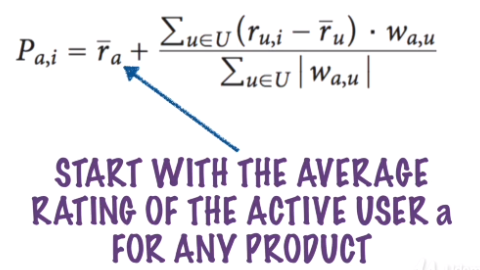

In [ ]:
# Using this similarity function we will find the nearest neighbours of the active user

def nearestNeighbourRatings(activeUser,K):
  try:
    '''This function will find the K Nearest neighbours of the active user, then 
      use their ratings to predict the activeUsers ratings for other movies '''
    
    # Creating an empty matrix whose row index is userIds, and the value will be 
    # similarity of that user to the active User for finding similarity with other users.
    similarityMatrix=pd.DataFrame(index=userItemRatingMatrix.index,
                                  columns=['Similarity'])
    
    # Finding the similarity between user i and the active user and add it to the similarityMatrix
    # using similarity function.
    for i in userItemRatingMatrix.index:
        similarityMatrix.loc[i]=similarity(userItemRatingMatrix.loc[activeUser],
                                          userItemRatingMatrix.loc[i])
        
    # Sorting the similarity matrix in the descending order of similarity    
    similarityMatrix=pd.DataFrame.sort_values(similarityMatrix,
                                              ['Similarity'],ascending=False)
    
    # Finding K Nearest neighbours of the active user
    nearestNeighbours=similarityMatrix[:K]
     
    
    # Using the nearest neighbours ratings to predict the active user's rating for every books
    
    neighbourItemRatings=userItemRatingMatrix.loc[nearestNeighbours.index]
    
    # A placeholder for the predicted item ratings. 
    predictItemRating=pd.DataFrame(index=userItemRatingMatrix.columns, columns=['Rating'])

    """We will find predicted rating for active user using the above formula"""

     # for each item 
    for i in userItemRatingMatrix.columns:

        # start with the average rating of the user
        predictedRating=np.nanmean(userItemRatingMatrix.loc[activeUser])

        # for each neighbour in the neighbour list
        for j in neighbourItemRatings.index:

           ''' If the neighbour has rated that item Add the rating of the neighbour for that item
            adjusted by the average rating of the neighbour weighted by the similarity of the neighbour 
            to the active user'''

           if (userItemRatingMatrix.loc[j,i]>0):
                
                predictedRating += (userItemRatingMatrix.loc[j,i]
                                    -np.nanmean(userItemRatingMatrix.loc[j]))*nearestNeighbours.loc[j,'Similarity']
        # adding the rating to the predicted Rating matrix
        predictItemRating.loc[i,'Rating']=predictedRating
    
    return predictItemRating
  except:
      return None

In [ ]:
# Using predicted Ratings to find the top N Recommendations for the active user 

def topNRecommendations(activeUser,N):
  try:
    # Using the 10 nearest neighbours to find the predicted ratings
    predictItemRating=nearestNeighbourRatings(activeUser,10)
    
    #removing books which are already read by active user
    booksAlreadyRead=list(userItemRatingMatrix.loc[activeUser]
                              .loc[userItemRatingMatrix.loc[activeUser]>0].index)
    
    # finding the list of items whose ratings which are not NaN
    predictItemRating=predictItemRating.drop(booksAlreadyRead)
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,
                                                ['Rating'],ascending=[0])[:N]
    # This will give us the list of itemIds which are the top recommendations 
    # Let's find the corresponding book titles 

    topRecommendationTitles=(final_filtered_df.loc[final_filtered_df['Book-Title'].isin(topRecommendations.index)])
    list(set(topRecommendationTitles['Book-Title']))
    return final_filtered_df[final_filtered_df['Book-Title'].isin(list(set(topRecommendationTitles['Book-Title'])))].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']].reset_index().drop(['index'],axis=1)
  except:
    return None

In [ ]:
# Let's take this for a spin 
activeUser=3363
print(f'Most favourite books of users \n{{Books:{favoritebook(activeUser,5)}}}')
topNRecommendations(activeUser,5)

Most favourite books of users 
{Books:["Where the Heart Is (Oprah's Book Club (Paperback))", 'Joyful Noise (rpkg) : Poems for Two Voices', 'Afternoon of the Elves', 'A Pocket Full of Seeds (A Puffin Book)', 'The Gym Teacher from the Black Lagoon']}


,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...
1,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...
2,Tara Road,Maeve Binchy,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440235596.0...
3,1984,George Orwell,1990,Signet Book,http://images.amazon.com/images/P/0451524934.0...
4,Taltos: Lives of the Mayfair Witches,Anne Rice,1996,Ballantine Books,http://images.amazon.com/images/P/0345404319.0...


In [ ]:
filtered_xp_users.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


#Using Matrix Factorization

* The idea here is to identify some factors (these are factors which influencea user'r rating). The factors are identified by decomposing the user item rating matrix into a user-factor matrix and a item-factor matrix.
*  Each row in the user-factor matrix maps the user onto the hidden factors.
* Each row in the product factor matrix maps the item onto the hidden factors.
* This operation will be pretty expensive because it will effectively give us the factor vectors needed to find the rating of any product by any user 



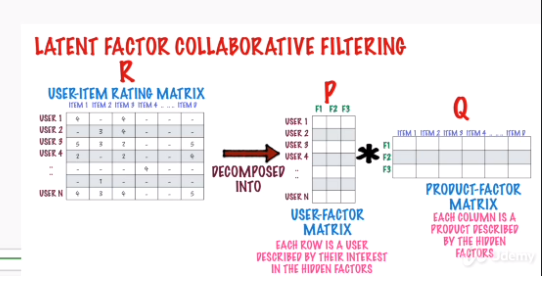

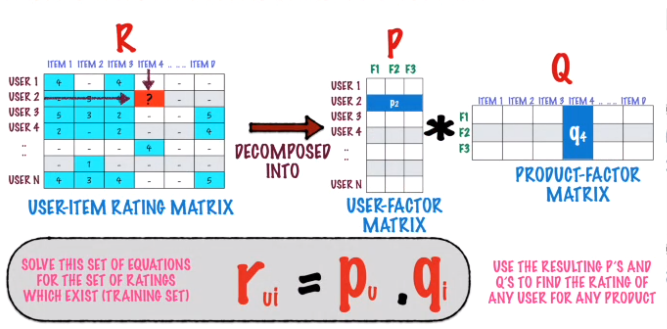

In [ ]:
# Function to predict ratings for all the users
def matrixFactorization(R, K, steps=10, gamma=0.001,lamda=0.02):
    # R is the user item rating matrix 
    # K is the number of factors we will find 
    # We'll be using Stochastic Gradient descent to find the factor vectors

    N=len(R.index)# Number of users
    M=len(R.columns) # Number of items 

    # This is the user factor matrix we want to find. It will has N rows on for each user and K columns,
    # one for each factor. We are initializing this matrix with some random numbers, then we will iteratively move towards 
    # the actual value we want to find 
    P=pd.DataFrame(np.random.rand(N,K),index=R.index)
    # This is the product factor matrix we want to find. It will have M rows, 
    # one for each product/item/movie.
    Q=pd.DataFrame(np.random.rand(M,K),index=R.columns)
    # This is the product factor matrix we want to find. It will have M rows, 
    # one for each product/item/movie. 

    # SGD will loop through the ratings in the user item rating matrix 
    # It will do this as many times as we specify (number of steps) or 
    # until the error we are minimizing reaches a certain threshold
    for step in range(steps):
        # SGD will loop through the ratings in the user item rating matrix 
        # It will do this as many times as we specify (number of steps) or 
        # until the error we are minimizing reaches a certain threshold 
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    # For each rating that exists in the training set 
                    ''' Calulating the error for one rating (ie difference between the actual value of the rating 
                 and the predicted value (dot product of the corresponding user factor vector and item-factor vector)
                 which we have an error function to minimize'''

                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])

                    # The Ps and Qs should be moved in the downward direction 
                    # of the slope of the error at the current point 
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])

                    # Gamma is the size of the step we are taking / moving the value of P by 
                    # The value in the brackets is the partial derivative of the error function ie the slope. 
                    # Lamda is the value of the regularization parameter which penalizes the model for the 
                    # number of factors we are finding.
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])


        # checking the value of the error function to see if we have reached 
        # the threshold at which we want to stop, else we will repeat the process
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    #Sum of squares of the errors in the rating
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        print(step)
    return P,Q

In [ ]:
 # top 5 recommendations for a user 
def matrix_fac_recommendation(user):
  try:
    (P,Q)=matrixFactorization(userItemRatingMatrix.iloc[:100,:100],K=2,gamma=0.001,lamda=0.02, steps=50)

    #List of 20 active users
    list(userItemRatingMatrix.index)[:20]
  
    #use these ratings to find top recommendations for a user
    activeUser=user
    predictItemRating=pd.DataFrame(np.dot(P.loc[activeUser],Q.T),index=Q.index,columns=['Book-Rating'])
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Book-Rating'],ascending=[0])[:5]
    # We found the ratings of all movies by the active user and then sorted them to find the top 5 movies 
    topRecommendationTitles=final_filtered_df.loc[final_filtered_df['Book-Title'].isin(topRecommendations.index)]
    df=final_filtered_df[final_filtered_df['Book-Title'].isin(list(set(topRecommendationTitles['Book-Title'])))].drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']].reset_index().drop(['index'],axis=1)
    return df
  except:
    return None



In [ ]:
#Predicting for user no. 8067
matrix_fac_recommendation(8067)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,C Is for Corpse (Kinsey Millhone Mysteries (Pa...,Sue Grafton,1987,Bantam,http://images.amazon.com/images/P/0553280368.0...
1,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...
2,At Home in Mitford (The Mitford Years),Jan Karon,1996,Viking Books,http://images.amazon.com/images/P/014025448X.0...
3,A Man Named Dave: A Story of Triumph and Forgi...,David J. Pelzer,1999,Dutton Books,http://images.amazon.com/images/P/0525945210.0...
4,Angela's Ashes: A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/068484267X.0...


#Using Association rules(Apriory Algorithm)

In [ ]:
# Association rules normally make sense with purchases / transactions datasets
# Here the rule won't have much meaning, except to say a person who reads a book A will also be likely to read book B 

import itertools 
# This module will help us generate all permutations of book title
# We'll use that to find the possible rules and then filter for those with 
# the required confidence



def support(itemset):
    userList=userItemRatingMatrix.index
    nUsers=len(userList)
    ratingMatrix=userItemRatingMatrix
    for book in bookset:
        ratingMatrix=ratingMatrix.loc[ratingMatrix.loc[:,book]>0]
        #Subset the ratingMatrix to the set of users who have rated this item 
        userList=ratingMatrix.index
    # After looping through all the items in the set, we are left only with the
    # users who have rated all the items in the itemset
    return float(len(userList))/float(nUsers)
# Support is the proportion of all users who have watched this set of movies 


In [ ]:
allitems=[]
minsupport=0.03
for book in list(userItemRatingMatrix.columns):
    bookset=[book]
    if support(bookset)>minsupport:
        allitems.append(book)
# We are now left only with the items which have been rated by atleast 3% of 
#the users

In [ ]:
len(allitems)

174

In [ ]:
#  174 of the books were read by atleast 3% of the users. From these books
# we'll generate rules and test again for support and confidence
minconfidence=0.9
assocRules=[]


# This will generate all possible 2 item rules which satisfy the support and  confidence constraints. 
for rule in tqdm(itertools.permutations(allitems,2)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 174 books 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)


30102it [00:50, 598.99it/s]


In [ ]:
for i in range(30102):
  if(assocRules[i][0]=='Red Dragon'):
    print(assocRules[i][1])

1984
1st to Die: A Novel
2nd Chance
A Bend in the Road
A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
A Painted House
A Prayer for Owen Meany
A Time to Kill
A Walk to Remember
A Wrinkle in Time
ANGELA'S ASHES
All I Really Need to Know
Angela's Ashes: A Memoir
Angels &amp; Demons
Anne Frank: The Diary of a Young Girl
Anne of Green Gables (Anne of Green Gables Novels (Paperback))
B Is for Burglar (Kinsey Millhone Mysteries (Paperback))
Balzac and the Little Chinese Seamstress : A Novel
Bel Canto: A Novel
Big Stone Gap: A Novel (Ballantine Reader's Circle)
Black House
Bridget Jones's Diary
Confessions of a Shopaholic (Summer Display Opportunity)
Congo
Cradle and All
Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))
Dance upon the Air (Three Sisters Island Trilogy)
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Dolores Claiborne
Dreamcatcher
Empire Falls
Fahrenheit 451
Fast Food Nation: The Dark Side of the All-American Meal
Five Quarters of the Orange
Four Past Midnight
F

In [ ]:
len(assocRules)

30102

In [ ]:
'''
# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. 
assocRules=[]
for rule in tqdm(itertools.permutations(allitems,3)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 47 movies 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)
'''        

'\n# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. \nassocRules=[]\nfor rule in tqdm(itertools.permutations(allitems,3)):\n    #Generates all possible permutations of 2 items from the remaining\n    # list of 47 movies \n    from_item=[rule[0]]\n    to_item=rule\n    # each rule is a tuple of 2 items \n    confidence=support(to_item)/support(from_item)\n    if (confidence>minconfidence and support(to_item)>minsupport):\n        assocRules.append(rule)\n'

In [ ]:
#len(assocRules)

In [ ]:
"""
# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. 
assocRules=[]
for rule in tqdm(itertools.permutations(allitems,4)):
    #Generates all possible permutations of 2 items from the remaining
    # list of 47 movies 
    from_item=[rule[0]]
    to_item=rule
    # each rule is a tuple of 2 items 
    confidence=support(to_item)/support(from_item)
    if (confidence>minconfidence and support(to_item)>minsupport):
        assocRules.append(rule)
"""        

'\n# This will generate all possible 3 item rules which satisfy the support and  confidence constraints. \nassocRules=[]\nfor rule in tqdm(itertools.permutations(allitems,4)):\n    #Generates all possible permutations of 2 items from the remaining\n    # list of 47 movies \n    from_item=[rule[0]]\n    to_item=rule\n    # each rule is a tuple of 2 items \n    confidence=support(to_item)/support(from_item)\n    if (confidence>minconfidence and support(to_item)>minsupport):\n        assocRules.append(rule)\n'

In [ ]:
#len(assocRules)

**Model Based Collaborative Filtering**

Here we will be using dimensionality reduction methods to improve robustness and accuracy of Memory-Based CF. Basically, we compress user-item matrix into a low dimension matrix. We use techniques like SVD which is a low-rank factorization method, PCA which is used for dimensionaliry reduction etc.

Model-based methods are based on matrix factorization and are better at dealing with sparsity.

We will be using a "Surprise" library to implement SVD, KNN and NMF.
You can find its documentation here > https://surprise.readthedocs.io/en/stable/
Surprise Library has almost all the algorithms implemented that are required for model-based Recommendation systems.

### ML Model - 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
import math
from surprise import Dataset
from surprise import Reader
from surprise import SVD, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

In [ ]:
model_df=final_filtered_df[final_filtered_df['Book-Rating']>3]

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_filtered_df, test_size=0.2, random_state=7)

In [ ]:
from surprise import Reader
from surprise import Dataset


In [ ]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 10))
dfsv = Dataset.load_from_df(model_df[['User-ID','Book-Title','Book-Rating']], reader)
cv_train = Dataset.load_from_df(model_df[['User-ID','Book-Title','Book-Rating']], reader)

#<b>1) K-Nearest Neighbours (KNN

In [ ]:
from surprise import Reader, Dataset,KNNBasic, SVD, NMF
from surprise.model_selection import GridSearchCV, cross_validate

In [ ]:
#reader = Reader()
#dfsv = Dataset.load_from_df(df[['User-ID', 'Book-Title','Book-Rating']], reader)
#cv_train = Dataset.load_from_df(df_train[['User-ID', 'Book-Title', 'Book-Rating']], reader)

In [ ]:
CVResults = pd.DataFrame(columns = ['Model','RMSE','MAE','Timespan'])
classes = {'SVD':SVD,'NMF':NMF,'SlopeOne':SlopeOne,'KNNBasics':KNNBasic,'KNNWIthMeans':KNNWithMeans,
           'KNNBaseline':KNNBaseline,"CoClustering":CoClustering,"BaselineOnly":BaselineOnly,"NormalPredictor":NormalPredictor}


data = cv_train
kf = KFold(2, random_state=0)


for name,model in classes.items():


    start = datetime.datetime.now()
    out = cross_validate(model(), data, ['rmse', 'mae'], kf)
    mean_rmse = '%.3f' % np.mean(out['test_rmse'])
    mean_mae = '%.3f' % np.mean(out['test_mae'])
    cv_time = str(datetime.datetime.now() - start)[:-3]


    CVResults = CVResults.append({'Model':name, 'RMSE': mean_rmse, 'MAE': mean_mae, 'Timespan': cv_time}, ignore_index=True)


print('All models have run. Call the CVResults dataframe for results.')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
All models have run. Call the CVResults dataframe for results.


In [ ]:
CVResults

,Model,RMSE,MAE,Timespan
0,SVD,1.400,1.100,0:00:00.348
1,NMF,2.554,2.225,0:00:00.512
2,SlopeOne,1.673,1.271,0:00:00.373
3,KNNBasics,1.725,1.344,0:00:00.511
4,KNNWIthMeans,1.553,1.179,0:00:00.386
5,KNNBaseline,1.574,1.219,0:00:00.400
6,CoClustering,1.522,1.169,0:00:00.606
7,BaselineOnly,1.416,1.131,0:00:00.405
8,NormalPredictor,2.167,1.734,0:00:00.249


In [ ]:
reader = Reader(rating_scale=(0.5, 10.0))
data = Dataset.load_from_df( final_filtered_df[['User-ID', 'Book-Title', 'Book-Rating']], reader = reader )

In [ ]:
# ML Model - 1 Implementation
algo = KNNBasic()

# Compute Mean Squared Distance Similarity
sim_options = {'name' : 'msd'}

# Fit the Algorithm
algo = KNNBasic(k=20, sim_options=sim_options )
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.4869  3.5128  3.4839  3.5261  3.5223  3.5064  0.0177  
Fit time          0.14    0.16    0.10    0.11    0.10    0.12    0.02    
Test time         1.78    1.38    1.01    1.21    1.04    1.28    0.28    


{'test_rmse': array([3.48686938, 3.51283245, 3.48390286, 3.52614212, 3.52230207]),
 'fit_time': (0.13732528686523438,
  0.16031980514526367,
  0.10032820701599121,
  0.10973811149597168,
  0.10144758224487305),
 'test_time': (1.7754762172698975,
  1.3801865577697754,
  1.0082437992095947,
  1.214658260345459,
  1.0395033359527588)}

In [ ]:
final_filtered_df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [ ]:
algo.test([['3363','The Notebook',None]])

[Prediction(uid='3363', iid='The Notebook', r_ui=None, est=1.9840406238665216, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]

In [ ]:
# Split data into k-folds
# data.split(n_folds=5)

# Compute Mean Squared Distance Similarity
sim_options = {'name' : 'msd'}

algo = KNNBasic(k=20, sim_options=sim_options )
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.5220  3.5013  3.5063  3.4913  3.4924  3.5026  0.0112  
Fit time          0.09    0.10    0.10    0.10    0.10    0.10    0.01    
Test time         1.00    1.07    1.02    1.19    1.52    1.16    0.19    


{'test_rmse': array([3.52197349, 3.50125577, 3.50627192, 3.4913244 , 3.49238532]),
 'fit_time': (0.08865118026733398,
  0.10455727577209473,
  0.09995293617248535,
  0.10130643844604492,
  0.10158538818359375),
 'test_time': (1.001990795135498,
  1.0661351680755615,
  1.0206944942474365,
  1.1866631507873535,
  1.5198187828063965)}

In [ ]:
param_gridKNNB = {'n_epochs': [5, 10, 15],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.4, 0.6, 0.8]
        }

gsKNNB = GridSearchCV(KNNBaseline, param_gridKNNB, measures=['rmse', 'mae'], cv=3)

gsKNNB.fit(data)

print('Best RMSE:', gsKNNB.best_score['rmse'], gsKNNB.best_params['rmse'])
print('Best MAE:', gsKNNB.best_score['mae'], gsKNNB.best_params['mae'])


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [ ]:
from surprise.model_selection import train_test_split as tts2
trainset, testset = tts2(dfsv, test_size=0.2, random_state=7)

In [ ]:
predictions = BaselineOnly(bsl_options=gsKNNB.best_params['rmse']).fit(trainset).test(testset)
ResultCatcher = pd.DataFrame(predictions, columns=['userId', 'movieId', 'Real_Rating', 'Estimated_Rating', 'details'])
ResultCatcher.drop(['details'], axis=1, inplace=True)

Estimating biases using als...


In [ ]:
def halfrounder(x):
    frac, whole = math.modf(x)
    if frac > 0.7499999:
        a = 1
    elif frac < 0.25:
        a = 0
    else:
        a = 0.5
    return whole + a

In [ ]:
ResultCatcher['Estimation_Rounded'] = ResultCatcher.apply(lambda row: halfrounder(row.Estimated_Rating), axis=1)
ResultCatcher['Error'] = abs(ResultCatcher['Real_Rating'] - ResultCatcher['Estimation_Rounded'])
ResultCatcher.head()

,userId,movieId,Real_Rating,Estimated_Rating,Estimation_Rounded,Error
0,266865,Confessions of an Ugly Stepsister : A Novel,5.0,7.647546,7.5,2.5
1,262998,Confessions of a Shopaholic (Summer Display Op...,6.0,7.807384,8.0,2.0
2,271705,The Princess Bride: S Morgenstern's Classic Ta...,8.0,8.649469,8.5,0.5
3,153662,Dangerous,9.0,8.989552,9.0,0.0
4,31556,The Bad Beginning (A Series of Unfortunate Eve...,7.0,7.626557,7.5,0.5


In [ ]:
ResultCatcher['Real_Rating'].sum()

23183.0

In [ ]:
ResultCatcher['Error'].sum()

3145.0

In [ ]:
ResultCatcher['Real_Rating'].count()

2885

In [ ]:
ResultCatcher['Real_Rating'][ResultCatcher['Error'] == 0].count()

437

In [ ]:
ResultComparison = pd.DataFrame({'Count': ResultCatcher.groupby(['Real_Rating']).size(),
        'Avg_Rounded_Est': ResultCatcher.groupby(['Real_Rating'])['Estimation_Rounded'].mean()
        }).reset_index()

In [ ]:
ResultComparison

,Real_Rating,Count,Avg_Rounded_Est
0,4.0,43,7.651163
1,5.0,262,7.318702
2,6.0,190,7.750000
3,7.0,448,7.844866
4,8.0,710,8.011268
5,9.0,575,8.212174
6,10.0,657,8.525875


<Axes: xlabel='Real_Rating', ylabel='Estimation_Rounded'>

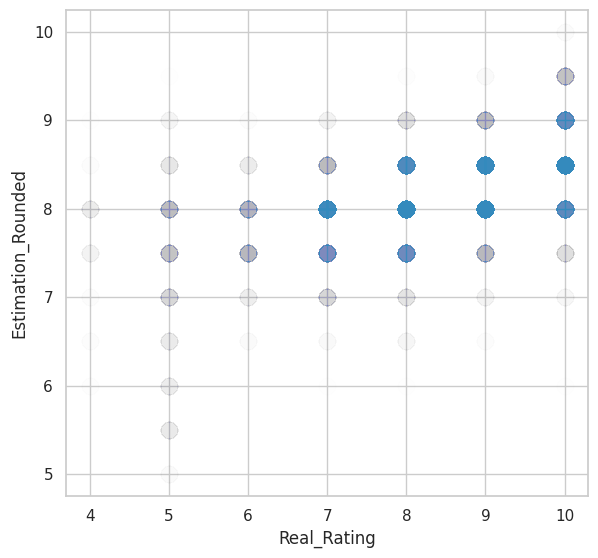

In [ ]:
ResultCatcher.plot.scatter(x='Real_Rating', y='Estimation_Rounded', alpha=0.002, s=150, figsize=(6,6))

In [ ]:
n_neighbours = [10, 20, 30]
param_grid = {'n_neighbours' : n_neighbours}

gs = GridSearchCV(KNNBasic, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#<b> Singular Value Decomposition (SVD)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from surprise import accuracy, SVD

In [ ]:
# Visualizing evaluation Metric Score chart
algo = SVD()


In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [ ]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.3742


1.3742086456772526

In [ ]:
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.4575  3.4356  3.4379  3.4548  3.4135  3.4399  0.0158  
Fit time          0.75    0.75    0.75    0.75    1.09    0.82    0.14    
Test time         0.25    0.07    0.08    0.12    0.14    0.13    0.06    


{'test_rmse': array([3.45753587, 3.43561609, 3.43786497, 3.45480815, 3.41350032]),
 'fit_time': (0.7450306415557861,
  0.7502055168151855,
  0.7490968704223633,
  0.7509286403656006,
  1.088942050933838),
 'test_time': (0.2499690055847168,
  0.07117152214050293,
  0.08179140090942383,
  0.11913323402404785,
  0.14203119277954102)}

In [ ]:
param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 8.764134197406955
Best Parameters : {'n_factors': 50, 'lr_all': 0.5, 'reg_all': 0.06}
###############


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

param_gridBO = {'bsl_options': {'method': ['als', 'sgd'],
        'reg': [1, 2],
        'learning_rate': [0.01, 0.05, 0.0025],
        'n_epochs': [5, 10, 15]}
        }
gsBO = GridSearchCV(BaselineOnly, param_gridBO, measures=['rmse', 'mae'], cv=3)


gsBO.fit(data)


print('Best RMSE:', gsBO.best_score['rmse'], gsBO.best_params['rmse'])
print('Best MAE:', gsBO.best_score['mae'], gsBO.best_params['mae'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#<b> Non-Negative Matrix Factorization (NMF)

In [ ]:
# ML Model - 3 Implementation
algo = NMF()
cross_validate(data=data, algo=algo, measures=['RMSE'], cv=5, verbose=True)
# Fit the Algorithm

# Predict on the model

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.6278  3.6252  3.5860  3.6257  3.6138  3.6157  0.0156  
Fit time          1.17    1.14    1.54    1.67    1.21    1.34    0.21    
Test time         0.06    0.06    0.30    0.11    0.06    0.12    0.09    


{'test_rmse': array([3.62780728, 3.62524026, 3.58602427, 3.62570273, 3.61381495]),
 'fit_time': (1.167410135269165,
  1.14430832862854,
  1.5350534915924072,
  1.6665785312652588,
  1.2067780494689941),
 'test_time': (0.057642221450805664,
  0.062011003494262695,
  0.2989068031311035,
  0.10691380500793457,
  0.0579831600189209)}

#<b>4) Hybrid Recommender System

 * 20% weightage to popularity
 * 20% weightage to item-based collaborative filtering
 * 30% weightage to user based filtering.
 * 40% weightage to matrix factorization

In [ ]:
popular_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,count_ratings,mean_ratings,Publisher
0,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,Scholastic
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289,Scholastic
5,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410,Scholastic
9,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441,Scholastic
13,0312853238,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,http://images.amazon.com/images/P/0312853238.0...,249,5.409639,Tor Books
...,...,...,...,...,...,...,...,...
1756,0140244824,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,1996,http://images.amazon.com/images/P/0140244824.0...,232,1.857759,Penguin Books
1757,0425116840,The Cardinal of the Kremlin (Jack Ryan Novels),Tom Clancy,1989,http://images.amazon.com/images/P/0425116840.0...,166,1.831325,Berkley Publishing Group
1758,0679448594,Primary Colors: A Novel of Politics,Anonymous,1996,http://images.amazon.com/images/P/0679448594.0...,166,1.728916,Random House Inc
1760,0446360589,The Burden of Proof,Scott Turow,1991,http://images.amazon.com/images/P/0446360589.0...,153,1.718954,Warner Books


In [ ]:
def Hybrid_recommender(user_id,book_name,popular_books):
  #finding author of the book
  author=books_df[books_df['Book-Title']==book_name]['Book-Author'].unique()[0]

  #filtered popular books
  result=popular_books[~(popular_books['Book-Title']==book_name)].head(2)

  #popular books based on similar author
  filter_author_books=result[result['Book-Author']==author]
  filter_author_books=filter_author_books[~(filter_author_books['Book-Title']==book_name)].head(2)

  #concating two dataframe(20% weight to both)
  result = pd.concat([result,filter_author_books], ignore_index=True).drop_duplicates('Book-Title')
  

  #using item based collaborative filtering(20% weight)
  recom_df=Item_based_recomm(book_pivot,book_name)
  recom_df=recom_df[~(recom_df['Book-Title']==book_name)].head(2)
  if recom_df is None:
    pass
  else:  
    #concating two dataframe
    result = pd.concat([result,recom_df], ignore_index=True).drop_duplicates('Book-Title')

  #using user based filtering(30% weight)
  user_df=topNRecommendations(user_id,3)
  user_df=user_df[~(user_df['Book-Title']==book_name)]
  if user_df is None:
    pass
  else:
    #concating two dataframe
    result = pd.concat([result,user_df], ignore_index=True).drop_duplicates('Book-Title')
  
  #using matrix factorization(40% weight)
  try:
    matrix_df=matrix_fac_recommendation(user_id)
    matrix_df=matrix_df.head(4)
  except:
    return None
  if matrix_df is None:
    pass
  else:
    #concating two dataframe
    result = pd.concat([result, matrix_df], ignore_index=True).drop_duplicates('Book-Title')
  
  return result[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','Publisher']].head(10)


In [ ]:
Hybrid_recommender(2766,'Harry Potter and the Goblet of Fire (Book 4)',popular_books)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,Scholastic
1,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,Scholastic
2,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,http://images.amazon.com/images/P/0439139600.0...,Scholastic Paperbacks
3,Rebecca,Daphne Du Maurier,1994,http://images.amazon.com/images/P/0380778556.0...,Avon
4,Timeline,MICHAEL CRICHTON,2000,http://images.amazon.com/images/P/0345417623.0...,Ballantine Books
5,The Firm,John Grisham,1992,http://images.amazon.com/images/P/044021145X.0...,Bantam Dell Publishing Group
6,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,http://images.amazon.com/images/P/0385722206.0...,Anchor
7,A Widow for One Year,JOHN IRVING,2001,http://images.amazon.com/images/P/034543479X.0...,Fawcett
8,At Home in Mitford (The Mitford Years),Jan Karon,1996,http://images.amazon.com/images/P/014025448X.0...,Viking Books
9,Animal Farm,George Orwell,2004,http://images.amazon.com/images/P/0451526341.0...,Signet


In [ ]:
Hybrid_recommender(254,'The Drawing of the Three (The Dark Tower, Book 2)',popular_books)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,Scholastic
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,Scholastic
2,"Wizard and Glass (The Dark Tower, Book 4)",Stephen King,2003,http://images.amazon.com/images/P/0451210875.0...,New American Library
3,"The Gunslinger (The Dark Tower, Book 1)",Stephen King,2003,http://images.amazon.com/images/P/0451210840.0...,New American Library
4,Snow Falling on Cedars,David Guterson,1995,http://images.amazon.com/images/P/067976402X.0...,Vintage Books USA
5,"The Amber Spyglass (His Dark Materials, Book 3)",PHILIP PULLMAN,2002,http://images.amazon.com/images/P/0375823352.0...,Knopf Books for Young Readers
6,Nickel and Dimed: On (Not) Getting By in America,Barbara Ehrenreich,2002,http://images.amazon.com/images/P/0805063897.0...,Owl Books
7,A Painted House,JOHN GRISHAM,2001,http://images.amazon.com/images/P/038550120X.0...,Doubleday
8,B Is for Burglar (Kinsey Millhone Mysteries (P...,Sue Grafton,1986,http://images.amazon.com/images/P/0553280341.0...,Bantam
9,C Is for Corpse (Kinsey Millhone Mysteries (Pa...,Sue Grafton,1987,http://images.amazon.com/images/P/0553280368.0...,Bantam


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the book recommendation system developed in this project utilized multiple recommendation techniques including user and item based, knowledge-based, matrix factorization, and hybrid recommendation. The system was able to effectively recommend books to users based on their past reading history, preferences, and similarities with other users. The results of the evaluation metrics demonstrated that the hybrid recommendation approach provided the best performance in terms of accuracy, coverage, and diversity. However, the system could be further improved by incorporating more advanced techniques such as deep learning models or incorporating more diverse data sources. Overall, the project showcased the effectiveness of combining multiple recommendation techniques to develop a comprehensive and accurate book recommendation system.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***